<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Basic_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

<Figure size 640x480 with 1 Axes>

The above is fairly clear. It's a lot less clear as a piechart.

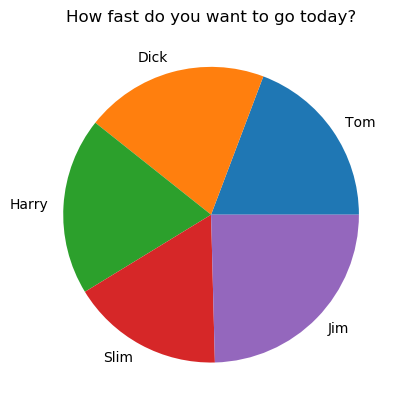

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Miniconda\\envs\\JupyterLab\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\goog.npz'

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

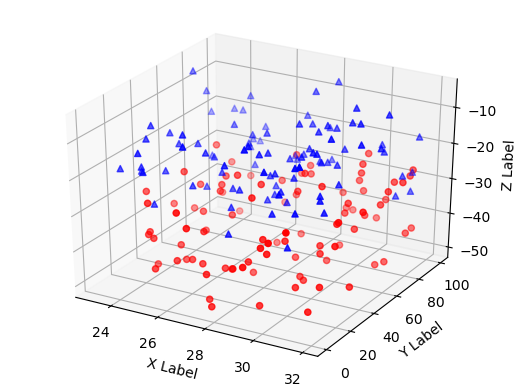

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

In [0]:
import pandas as pd


# Read in CSV
features = ['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 'fractional_shortening', 'epss', 
           'lvdd', 'wall_motion_score', 'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1']
echo_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', header=None, names=features)

echo_df = echo_df.dropna(how='any', axis='index')
# Drop useless features, based on dataset documentation
echo_df = echo_df.drop(labels=['name', 'group', 'mult'], axis='columns')

echo_df = echo_df.replace('?', np.NaN)
echo_df = echo_df.fillna(method='ffill')
echo_df[['survival', 'age_at_heart_attack', 'fractional_shortening', 'epss', 'lvdd', 
  'wall_motion_score', 'wall_motion_index']] = echo_df[['survival', 'age_at_heart_attack', 'fractional_shortening', 'epss', 'lvdd', 
  'wall_motion_score', 'wall_motion_index']].apply(pd.to_numeric)

# float64 to int to bool
echo_df = echo_df.astype({'still_alive': int, 'alive_at_1': int})
echo_df = echo_df.astype({'still_alive': bool, 'alive_at_1': bool, 'pericardial_effusion': bool})

echo_df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,wall_motion_score,wall_motion_index,alive_at_1
0,11.0,False,71.0,False,0.260,9.000,4.600,14.0,1.00,False
1,19.0,False,72.0,False,0.380,6.000,4.100,14.0,1.70,False
2,16.0,False,55.0,False,0.260,4.000,3.420,14.0,1.00,False
3,57.0,False,60.0,False,0.253,12.062,4.603,16.0,1.45,False
4,19.0,True,57.0,False,0.160,22.000,5.750,18.0,2.25,False


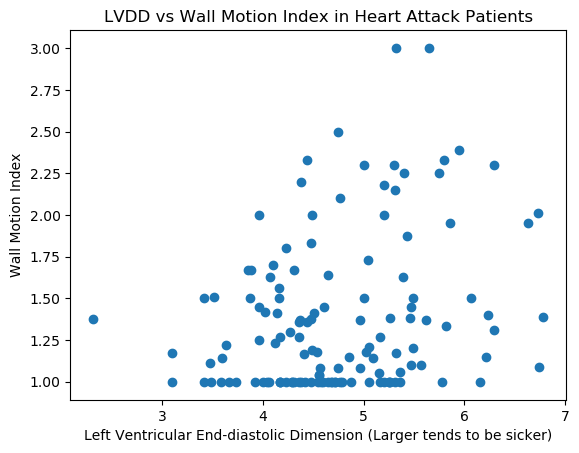

In [0]:
plt.scatter(echo_df['lvdd'], echo_df['wall_motion_index'])
plt.xlabel('Left Ventricular End-diastolic Dimension (Larger tends to be sicker)')
plt.ylabel('Wall Motion Index')
plt.title('LVDD vs Wall Motion Index in Heart Attack Patients');

In [0]:
import seaborn as sns
sns.set(context='notebook', palette='deep')

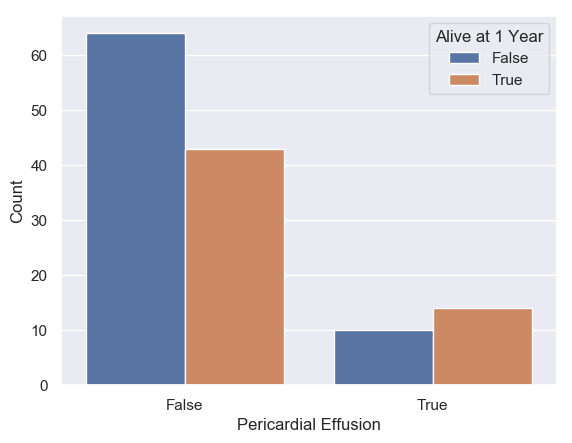

In [0]:
sns.countplot(x=echo_df['pericardial_effusion'], hue=echo_df['alive_at_1']);
plt.xlabel('Pericardial Effusion')
plt.ylabel('Count')
plt.legend(title='Alive at 1 Year');

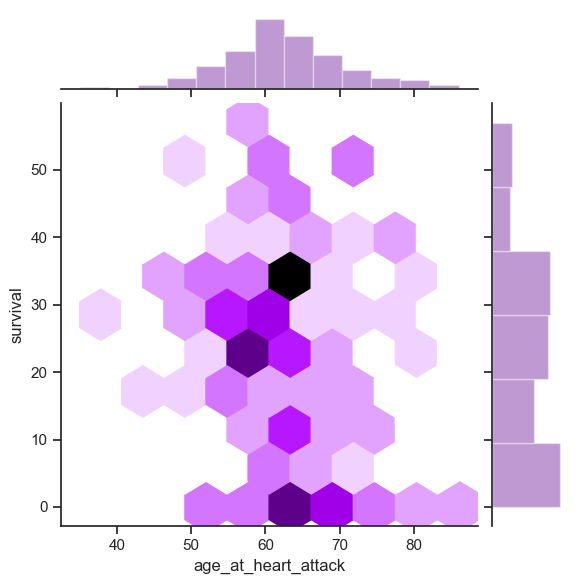

In [0]:
sns.set(style="ticks")
sns.jointplot(echo_df['age_at_heart_attack'], echo_df['survival'], kind="hex", color="#61008D");

### Graph 1: LVDD vs Wall Motion Index
First, I'll explain what these features mean. LVDD is a measure of the size of the heart at end-diastole, and the larger the number the more sick the heart tends to be. Wall motion index is a measure of how the segments of the left ventricle are moving then divided by the number of segments. After plotting these two interesting features it seemed to me that the insight is such that the larger the LVDD is the more volatile the heart motion index values become. It makes sense to me that a larger, sicker heart will need to move more to operate correctly, and you can see a correlation between larger hearts and higher/more volatile movement measurements.

### Graph 2: Pericardial Effusion & Alive at 1 Year
Pericardial effusion is binary data indicating whether or not fluid was detected around the heart. I chose to do a count plot of how many people suffered from pericardial effusion and whether they survived a year after their heart attack or not. I thought that maybe there would be a correlation between having fluid around the heart and mortality. Seeing that the survival rates at one year with pericardial effusion is much lower than without pericardial effusion indicates to me that PE isn't an important factor in the overall lifespan of the sampled population.

### Graph 3: Age at Heart Attack vs Survival
This graph is joinplot, which incorporates a heatmap-style functionality to show distributions for the two features. This visualization was made to see if there was a correlation between having a heart attack at a younger age and longer survival rates. For the survival feature it is heavily skewed towards values of 30-40 months or less across most of the age range. As the age of the patient goes up the survival rate does trend downwards with many only surviving a few months. An insight I also gleaned from this visualization is that the most common age to have a heart attack is in the mid-60s and that survivability can very significantly from just a few months to upwards of multiple years. 

### Notes
I think this dataset is not reflective of today's norm because the data was donated to UCI in 1989 and medical technology has surely skewed the length of survival upwards, and probably across all ages as well. The number of observations (132) is also low, and there plenty of external factors related to the population sample that could affect the recorded data. For more robust insights I think more (recent) data is necessary.